In [345]:
import numpy as np
from PIL import Image
import os
import sys
import cv2
from Otsu import Otsu
from CurveDetect import CurveDetect
from tools import delete_noise, show_prediction
import sys
sys.path.append("../main/")
from validation import validate
from Devide import Devide

In [356]:
i = 6

17
f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb


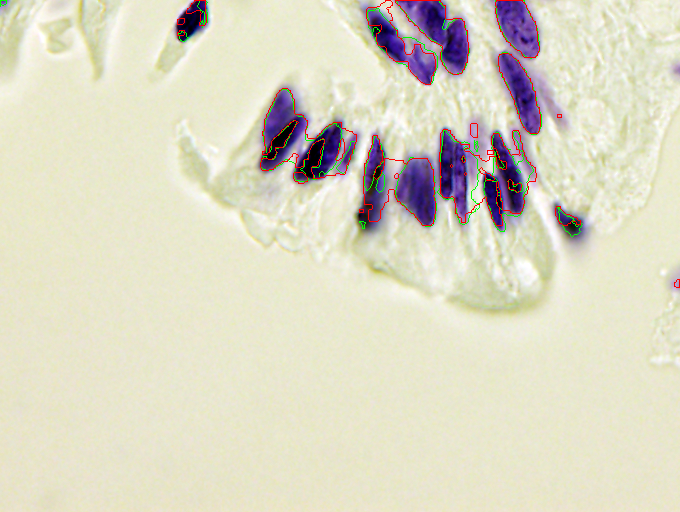

In [368]:
# test画像の分析
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/stage1_test/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/answer/"
COMPARE_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/answer_0352/"

print(i)
filenames = os.listdir(ANSWER_FILE_ROOT)
filename = filenames[i].split(".")[0]
print(filename)
i += 1

original_image =  Image.open(TEST_FILE_ROOT + filename + '/images/' + filename + ".png")
predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")
compare_image = Image.open(COMPARE_FILE_ROOT + filename + ".png") 

original_image_array = np.asarray(original_image)[:, :, :3].copy()
predicted_mask_array = np.asarray(predicted_mask) # green
compare_image_array = np.asarray(compare_image) # red
#devide = Devide(original_image_array, predicted_mask_array)
#predicted_mask_array = devide.make_mask()

dst = show_prediction(original_image_array, predicted_mask_array, compare_image_array)
dst

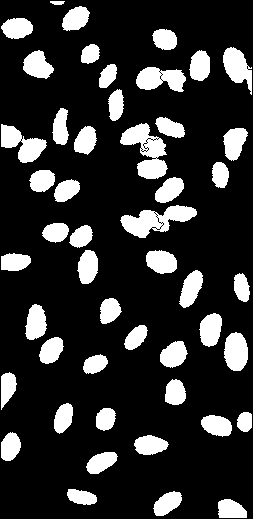

In [26]:
Image.fromarray(predicted_mask_array)

In [7]:
i = 0

12
351771edfc5db5665ded8aa4940257276b6526663c76e3b60b92a52584d8943c.png
score:  0.4348611171928142
0.5 : 0.7946428571428571
0.55 : 0.7787610619469026
0.6 : 0.7327586206896551
0.65 : 0.6341463414634146
0.7 : 0.47794117647058826
0.75 : 0.3958333333333333
0.8 : 0.2967741935483871
0.85 : 0.1686046511627907
0.9 : 0.06914893617021277
0.95 : 0.0


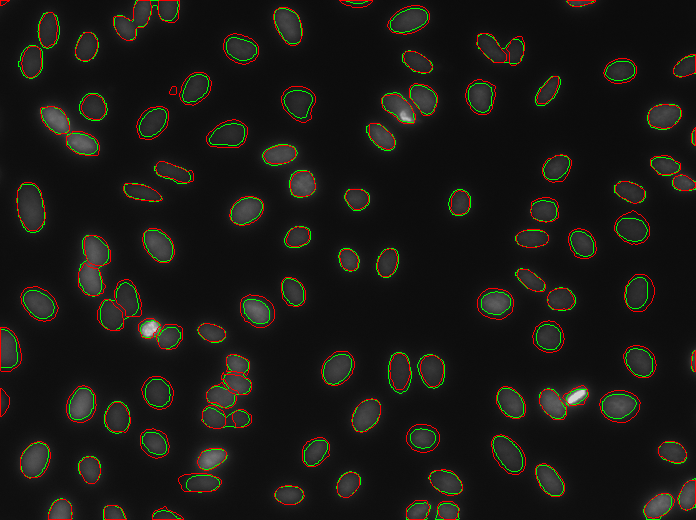

In [344]:
# validation画像の分析
TRAIN_FILE_ROOT_COLOR = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default_color/"
TRAIN_FILE_ROOT_GRAY  = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default_gray/"
VALIDATION_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/answer_val13/"
TRAIN_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default/"

print(i)
filenames = os.listdir(VALIDATION_FILE_ROOT)
filename = filenames[i]
print(filename)
i += 1

original_image =  Image.open(TRAIN_FILE_ROOT + '/images/' + filename)
predicted_mask = Image.open(VALIDATION_FILE_ROOT + filename )
gt_mask = Image.open(TRAIN_FILE_ROOT + 'masks/' + filename)
original_image_array = np.asarray(original_image)[:, :, :3].copy()  # なぜかcopyを入れないと動かない・・・
predicted_mask_array = np.asarray(predicted_mask)
gt_mask_array = np.asarray(gt_mask)

val, vs, _ = validate(predicted_mask_array, gt_mask_array)
threshold = np.linspace(0.5, 0.95, 10)
threshold = np.around(threshold, decimals=2)
print("score: ", val)
for v, thresh in zip(vs, threshold):
    print(thresh, ":", v)
    
dst = show_prediction(original_image_array, predicted_mask_array, gt_mask_array)
dst

In [19]:
tmp = Devide(original_image_array, predicted_mask_array)

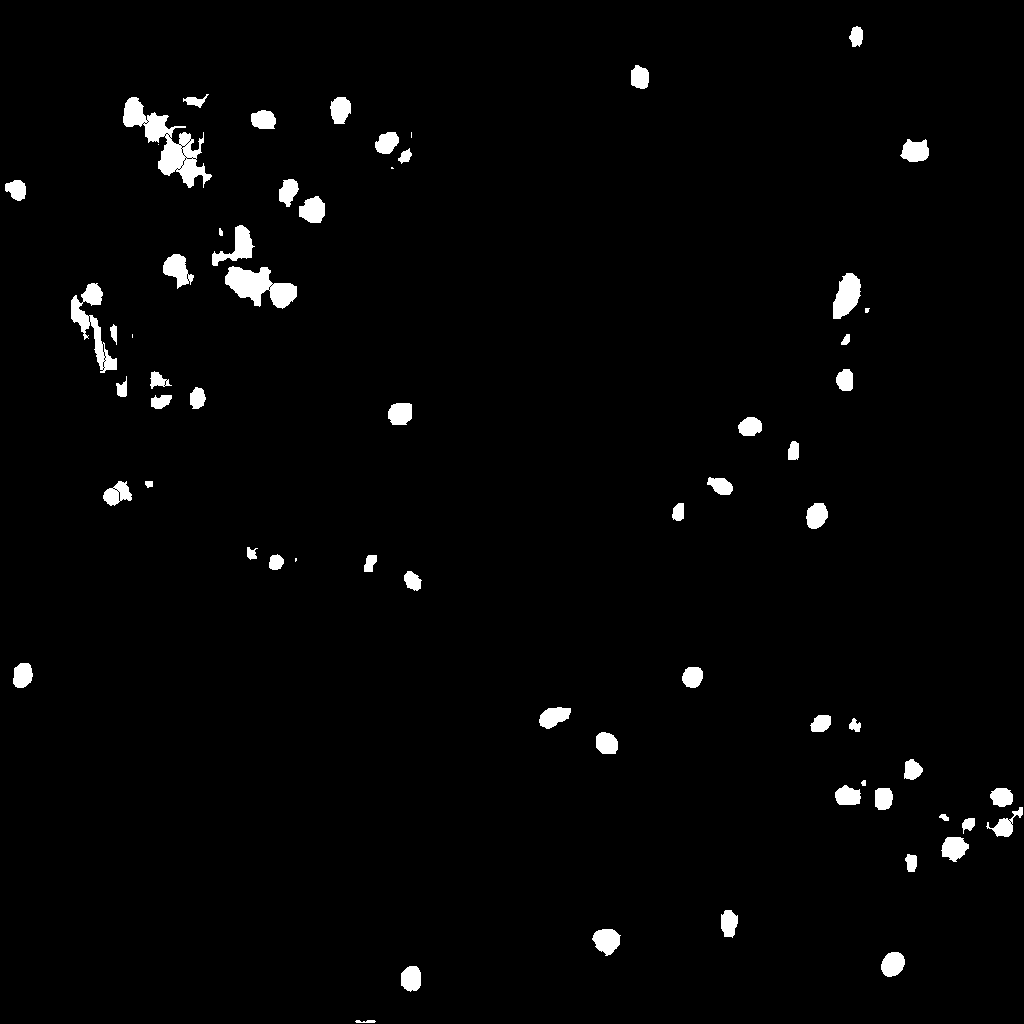

In [20]:
Image.fromarray(((tmp.data() != 1) * (tmp.data() != -1) * 255).astype(np.uint8))

In [71]:
i = 0

In [103]:
# test画像の分析
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/Tissue_images/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/tmp/"

print(i)
filenames = os.listdir(ANSWER_FILE_ROOT)
filename = filenames[i].split(".png")[0]
print(filename)
i += 1
#filename = "TCGA-18-5592-01Z-00-DX1"

original_image =  Image.open(TEST_FILE_ROOT + filename + ".tif-0.png")
predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")

original_image_array = np.asarray(original_image)[:, :, :3].copy()
predicted_mask_array = np.asarray(predicted_mask) # green
#devide = Devide(original_image_array, predicted_mask_array)
#predicted_mask_array = devide.make_mask()

dst = show_prediction(original_image_array, predicted_mask_array)
dst

30


IndexError: list index out of range

In [273]:
filename = "/data/unagi0/kanayama/dataset/nuclei_images/answer_val_probs/0/probs.npy"
filename = "/data/unagi0/kanayama/dataset/nuclei_images/answer_val/610f32e2d9d270d740aec501dcf0c89595e4e623468ad43272adab90520a8f96.npy"

In [274]:
x = np.load(filename)

In [275]:
x

array([[0.43270037, 0.42750502, 0.42602658, ..., 0.42934862, 0.43094474,
        0.4339154 ],
       [0.42842156, 0.41843882, 0.41545022, ..., 0.42192787, 0.42413816,
        0.4308306 ],
       [0.4254507 , 0.41435283, 0.4115745 , ..., 0.41843516, 0.42270795,
        0.42872646],
       ...,
       [0.42490745, 0.41212815, 0.40918106, ..., 0.41745934, 0.4214379 ,
        0.42898116],
       [0.42626032, 0.41606674, 0.41349354, ..., 0.42088586, 0.4248172 ,
        0.43138653],
       [0.43257278, 0.4247746 , 0.42267954, ..., 0.42975906, 0.43315768,
        0.43816787]], dtype=float32)

In [276]:
x.max()

0.43816787

In [277]:
x.shape

(640, 640)

In [278]:
x.min()

0.4050263